In [1]:
import pandas as pd
import numpy as np
import re

import importlib
import matplotlib.pyplot as plt
import collections

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_percentage_error

from xgboost import XGBRegressor


from sklearn.model_selection import  train_test_split

import pickle

import gzip

In [2]:
import os
os.chdir('../')
# importlib.reload(functions.model_wrapper)
from functions.model_wrapper import Tree_Model, xgboost_params

In [3]:
with gzip.open('data/gzipX_train_transformed.pckl', 'rb') as f:
    X_train_transformed = pickle.load(f)
with gzip.open('data/gzipX_val_transformed.pckl', 'rb') as f:
    X_val_transformed = pickle.load(f)  
with gzip.open('data/gzipX_holdout_transformed.pckl', 'rb') as f:
    X_holdout_transformed = pickle.load(f)  


with gzip.open('data/gzipy_train.pckl', 'rb') as f:
    y_train = pickle.load(f)
with gzip.open('data/gzipy_val.pckl', 'rb') as f:
    y_val = pickle.load(f)
with gzip.open('data/gzipy_holdout.pckl', 'rb') as f:
    y_holdout = pickle.load(f)

In [4]:
xgboost_params['eval_set'] = [(X_val_transformed, y_val)]

In [5]:
xgboost_params['learning_rate'] = xgboost_params['learning_rate']/20
# xgboost_params['learning_rate']
xgboost_params["n_jobs"] = 2

[16:57:47] ======== Monitor (0): HostSketchContainer ========
[16:57:47] AllReduce: 0.007832s, 1 calls @ 7832us

[16:57:47] MakeCuts: 0.00919s, 1 calls @ 9190us

[16:57:49] DEBUG: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:130: Using tree method: 0


/Users/willtong/miniforge3/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:57:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.13382
[100]	validation_0-rmse:33.02172
[200]	validation_0-rmse:32.90159
[300]	validation_0-rmse:32.78624
[400]	validation_0-rmse:32.68368
[500]	validation_0-rmse:32.58863
[600]	validation_0-rmse:32.47554
[700]	validation_0-rmse:32.36227
[800]	validation_0-rmse:32.24761
[900]	validation_0-rmse:32.13897
[1000]	validation_0-rmse:32.03188
[1100]	validation_0-rmse:31.93512
[1200]	validation_0-rmse:31.82868
[1300]	validation_0-rmse:31.73318
[1400]	validation_0-rmse:31.63983
[1500]	validation_0-rmse:31.53827
[1600]	validation_0-rmse:31.43782
[1700]	validation_0-rmse:31.34653
[1800]	validation_0-rmse:31.26109
[1900]	validation_0-rmse:31.17356
[2000]	validation_0-rmse:31.08978
[2100]	validation_0-rmse:31.00094
[2200]	validation_0-rmse:30.91564
[2300]	validation_0-rmse:30.82388
[2400]	validation_0-rmse:30.74221
[2500]	validation_0-rmse:30.66022
[2600]	validation_0-rmse:30.57350
[2700]	validation_0-rmse:30.48085
[2800]	validation_0-rmse:30.40013
[2900]	validation_0-rmse:3

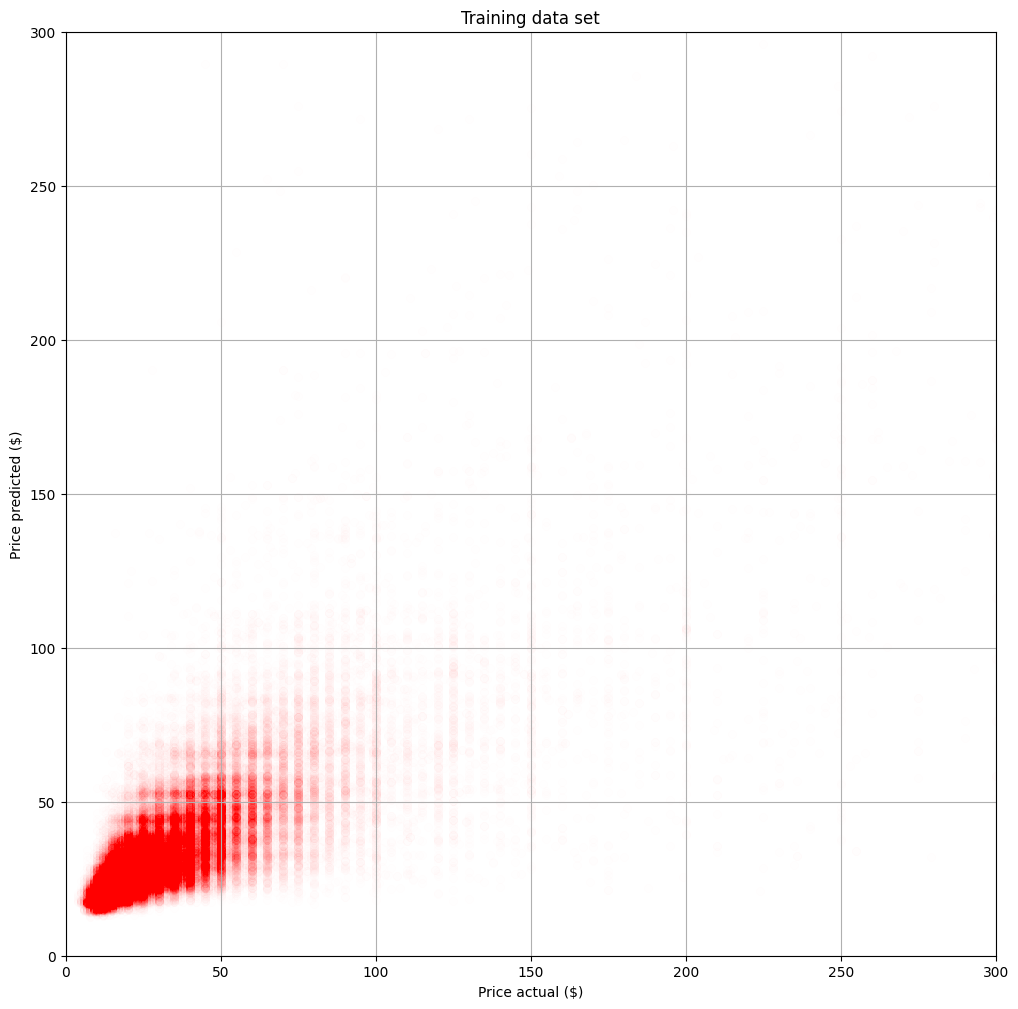

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=0.5, colsample_bytree=0.5,
             device=None, early_stopping_rounds=20, enable_categorical=False,
             eval_metric='rmse',
             eval_set=[(        norm-points  title_1997  title_1998  title_1999  title_2000  \
108206     0.801174       False       False       False       False   
24739     -0.839926       False       False       False       False   
92115      1.347483       Fal...
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.000125, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=1000000, n_jobs=2, num_parallel_tree=None, ...)

In [7]:
gbm = Tree_Model(Model = XGBRegressor,
                 params = xgboost_params
                 )
gbm.fit(X_train_transformed, y_train)

In [8]:
with open('data/gbm_model_lr-1p25-4.pckl', 'wb') as f:
    pickle.dump(gbm, f)

In [9]:
feature_importances = gbm.feature_imp
with open('data/feature_importances_gbm_1p25-4.pckl', 'wb') as f:
    pickle.dump(feature_importances, f)

<class 'pandas.core.series.Series'>
type(y_actual) = <class 'pandas.core.series.Series'>
type(y_actual) = <class 'pandas.core.series.Series'>
self.y_data_type = <class 'pandas.core.series.Series'>
MdAPE is 31.573936577999227%
Plotting scatter plot..
R2: 0.380, RMSE: 31.023, MAE: 12.844


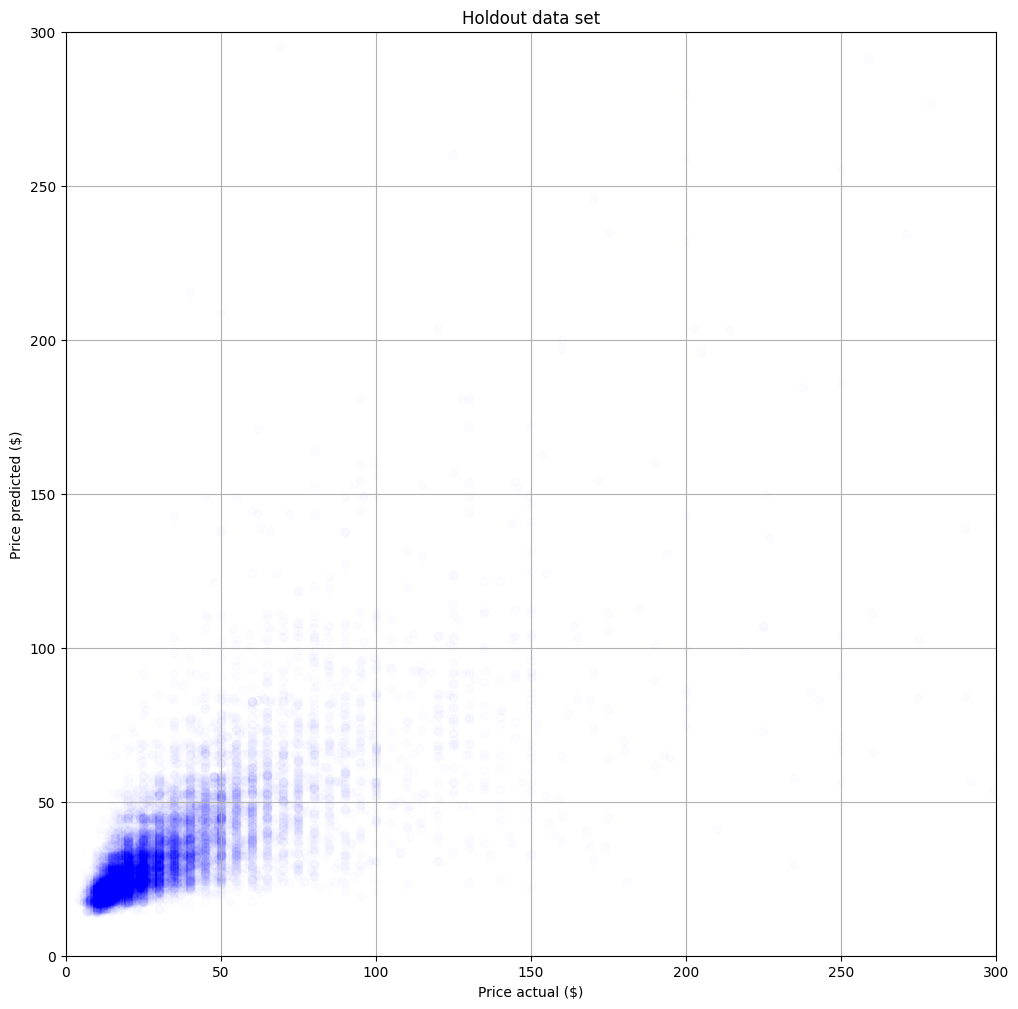

In [10]:
y_pred = gbm.predict(X_holdout_transformed, y_holdout)